In [8]:
# Load libraries
import csv
import matplotlib.pyplot as plt
import numpy as np
import os
import statistics
from mpl_toolkits.mplot3d import Axes3D

In [9]:
# Set filepath

# repository='/home/ebb505/ARE_Project/are-logs/PPSN/BL/'
# experimentName = "RS"

# repository='/home/ebb505/ARE_Project/are-logs/PPSN/NS/'
# experimentName = "NS"

# repository='/home/ebb505/ARE_Project/are-logs/PPSN/GRi/'
# experimentName = "GRi"

repository='/home/ebb505/ARE_Project/are-logs/PPSN/GRe/'
experimentName = "GRe"

filename='norepmorphdesc.csv'

In [10]:
# Get all directories
folders = []
# r=root, d=directories, f = files
for r, d, f in os.walk(repository):
    for folder in d:
        folders.append(os.path.join(r, folder))
print("Folders found:", len(folders))

Folders found: 15


In [11]:
# Get information from files
my_replicates = []
for f in folders:
    my_list = []
    with open(f + '/' + filename, 'r') as csvfile:
        data = csv.reader(csvfile, delimiter=',', quotechar='"')
        for row in data:
            my_list.append(row[:-1]) # Last character is empty for some reason
    my_replicates.append(my_list)

In [12]:
# elementX = 4
# elementY = 5
# xVariable = "Wheels"
# yVariable = "Sensors"
# rangeX = [0,1,2,3,4,5,6,7,8,9,10] 
# posX = np.arange(0,1.1,0.1) # Why are these offsets necessary?

elementX = 1
elementY = 2
elementZ = 3
xVariable = "Width"
yVariable = "Depth"
zVariable = "Height"
rangeX = [0,0.05,0.1,0.15,0.2,0.25] 
posX = np.arange(0,1.1,0.2) # Why are these offsets necessary?

population = 40
#replicates = len(my_replicates)
replicates = 15
#evaluations = len(my_replicates[0])
evaluations = 20000
features = len(my_replicates[0][0])
generations = int(evaluations / population)
print("Replicates: ", replicates, "Evaluations: ", evaluations, "Features: ", features, "Generations: ", generations)

Replicates:  15 Evaluations:  20000 Features:  6 Generations:  500


In [13]:
# Process data
repRes = np.array([[float(y) for y in x] for x in my_replicates[0]])
for rep in range(1,replicates,1):
    repRes = np.concatenate((repRes, np.array([[float(y) for y in x] for x in my_replicates[rep]])),axis=0)
    print(len(repRes))
print("Done!")

19932
29924
39404
49263
58867
68388
77874
87118
96655
106786
116532
126123
135910
145561
Done!


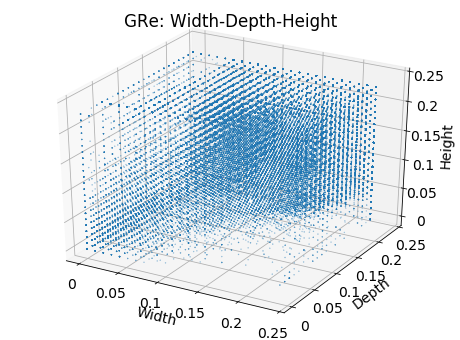

In [14]:
# Plot stuff
font = {'weight' : 'normal',
        'size'   : 14}
plt.rc('font', **font)
# Plot stuff
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111,projection='3d')
ax.set_xlabel(xVariable)
ax.set_ylabel(yVariable)
ax.set_zlabel(zVariable)
ax.scatter(repRes[:,elementX],repRes[:,elementY],repRes[:,elementZ], s=0.1, marker='o')
# axes = plt.gca()
# axes.set_xlim([0,1.0])
# axes.set_ylim([0,1.0])
# axes.set_zlim([0,1.0])
# axes = plt.gca()
title = experimentName + ': ' + xVariable + '-' + yVariable + '-' + zVariable
plt.title(title)

ax.set_xticks(posX)
ax.set_xticklabels(rangeX)
ax.set_yticks(posX)
ax.set_yticklabels(rangeX)
ax.set_zticks(posX)
ax.set_zticklabels(rangeX)


plt.savefig(repository+experimentName+xVariable+yVariable+'3DScatterPop.png', dpi=200)